.

<b  style="font-family: Arial; font-size:4em;color:navy;"> Forecasting the reasons for Claims  </b>

# Author : Rijuta Patil

The article contains the analsyis done on the data to know about the top reasons the claims are done in the United States.

This notebook uses the dataset available on the website
(https://data.world/chiragckarkera/base-analytics/workspace/file?filename=Claims.csv) 


The main goal of the article is to demonstrate the various factors  which affect the claimant in United States through exploratory  analysis. 

In [135]:
# Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bqplot
import ipywidgets
import plotly.express as px
import seaborn as sns

In [136]:
# Retrieving the csv file
claims = pd.read_csv("Claims.csv", 
                      low_memory=False)  



# Dashboard consisting of Heatmap and Line plot

In [137]:
# Use groupby to group by the same values and get the mean of the claim amount

claims_1 = claims.groupby(['Claimant State','Cause'])['Claims'].mean().reset_index()
#claims_1

In [138]:
claims_p = claims_1.pivot_table(index='Claimant State', columns='Cause',values=['Claims'])
#claims_p

In [139]:
# Finding the building values to understand nan values of the claims column

claims_values  = claims_p.values
#claims_values

## Heatmap

In [140]:
# Scales for color, x-axis and y-axis
col_sc = bqplot.ColorScale(scheme = 'RdPu',min=np.nanmin(claims_p), 
                           max=np.nanmax(claims_p))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# Axis for color, x-axis and y-axis
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc,label='Claims Cause')
y_ax = bqplot.Axis(scale = y_sc, label='Claimant State',
                   orientation = 'vertical')

# Marks for color, x-axis and y-axis
heat_map = bqplot.GridHeatMap(color = claims_p,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column':x_sc },
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# Plotting the heatmap
Gridheatmap = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])
Gridheatmap

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=477367.5, min=0.0, scheme='RdPu'), side='r…

In [141]:
# Use group by to get the mean of the claim 
claims_2 = claims.groupby('Policy Year')['Claims'].mean().reset_index()

# Getting a look at the values of the fields in the specified columns

claims_year= np.array(claims_2['Claims'].astype('float'))
claims_mean = np.array(claims_2['Claims'].astype('float'))
claims_year
claims_mean

array([14504.0155521 , 14843.38309353, 20913.71082621, 56343.31372549,
       37023.40769231, 38737.5       , 35034.12      , 52908.47663551,
       41795.44444444, 58532.99595142, 38296.05300353, 31238.21487603,
       27909.94207317, 10888.15384615,  2662.37908497])

## Line plot

In [142]:
state = claims_p.iloc[:, claims_p.columns.get_level_values('Cause')=='Claimant State']

In [143]:
state2 =state.reset_index().xs('Claimant State', axis=1, drop_level=True).reset_index()

In [144]:
states = state2['Claimant State'].values.tolist()
states_index = state2['index'].values.tolist()

In [145]:
states_dict = dict(zip(states_index, states))

In [146]:
# Defining the scales
x_scale = bqplot.LinearScale(min=2000,max=2019) 
y_scale = bqplot.LinearScale(min=0, max=400000)
width_line = bqplot.LinearScale()

#Defining the axis 
axis_xcl = bqplot.Axis(label='Policy Year', scale=x_scale)
axis_ycl = bqplot.Axis(label='Mean Claim amount', scale=y_scale, 
                    orientation='vertical', side='left')

#Plotting the line graph
lineplt = bqplot.Lines(x = claims_year,
                               y = claims_mean, 
                              scales={'x':x_scale, 'y':y_scale,'width': width_line,}
                                      )


Lineplot = bqplot.Figure(marks = [lineplt], axes = [axis_xcl, axis_ycl])
Lineplot

Figure(axes=[Axis(label='Policy Year', scale=LinearScale(max=2019.0, min=2000.0)), Axis(label='Mean Claim amou…

In [147]:
claims_3 = claims.groupby(['Policy Year','Claimant State'])['Claims'].mean().reset_index()

In [148]:
claims_3.reset_index()

,index,Policy Year,Claimant State,Claims
0,0,2000,California,13943.807128
1,1,2000,Colorado,1018.250000
2,2,2000,Florida,7253.937500
3,3,2000,Georgia,476.500000
4,4,2000,Hawaii,90523.714286
...,...,...,...,...
324,324,2014,Tennessee,382.000000
325,325,2014,Texas,5196.210526
326,326,2014,Utah,1305.571429
327,327,2014,Virginia,8751.000000


## Creating interactivity between Heatmap and Line plot

In [149]:
#hist2d, long_edges, lat_edges = np.histogram2d(claims_year,claims_mean)
#print(long_edges)
#print(lat_edges)
#Using ipywidgets to generate interactivity
mySelectedLabel = ipywidgets.Label()


def get_data_value2(change):
    i,j = change['owner'].selected[0]
    v = claims_values[i,j] # grab data value
    selected_state = states_dict[i]
    mySelectedLabel.value = 'Selected State - '+str(selected_state)+', Mean claim amount = ' + str(v) # set our label
    claims_new = claims_3[claims_3['Claimant State']==selected_state]
    lineplt.x = np.array(claims_new['Policy Year']).astype('float') # Changing X-Axis for 
    lineplt.y = np.array(claims_new['Claims']).astype('float')
    axis_xcl.label='Years of the policy for - ' + str(selected_state)
    axis_ycl.label='Mean Claim Amount for  - ' + str(selected_state)
    x_scale.min = lineplt.x.min()
    x_scale.max = lineplt.x.max()
    y_scale.min = lineplt.y.min()
    y_scale.max = lineplt.y.max()
   # states = {'1':}
   


heat_map.observe(get_data_value2, 'selected')

# Creating the final dashboard with both the left and right side

Gridheatmap.min_width='500px'
Lineplot.layout.min_width='500px'


plots=ipywidgets.HBox([Gridheatmap,Lineplot])

ipywidgets.VBox([mySelectedLabel,plots ])

In [150]:
claims_p.reset_index()

Claimant State                                Claims  \
Cause                            Burn or Scald - Heat or Cold Exposure   
0                        Alabama                                   NaN   
1                        Arizona                                   NaN   
2                     California                           9070.279070   
3      Canada - British Columbia                                   NaN   
4                       Colorado                                   NaN   
5                    Connecticut                           4759.000000   
6                       Delaware                                   NaN   
7                        Florida                             11.333333   
8                Foreign Country                                   NaN   
9                        Georgia                                   NaN   
10                        Hawaii                                   NaN   
11                         Idaho                                   NaN   
12                      Illinois                           2236.000000   
13                       Indiana                                   NaN   
14                          Iowa                                   NaN   
15                        Kansas                                   NaN   
16                      Kentucky                                   NaN   
17                     Louisiana                           2893.000000   
18                         Maine                                   NaN   
19                      Maryland                                   NaN   
20                Massachussetts                                   NaN   
21                      Michigan                           2524.166667   
22                     Minnesota                                   NaN   
23                   Mississippi                                   NaN   
24                      Missouri                                   NaN   
25                       Montana                                   NaN   
26                      Nebraska                                   NaN   
27                        Nevada                                   NaN   
28                 New Hampshire                                   NaN   
29                    New Jersey                          32982.000000   
30                    New Mexico                            474.333333   
31                      New York                           1118.400000   
32                North Carolina                           4847.500000   
33                          Ohio                                   NaN   
34                        Oregon                                   NaN   
35                  Pennsylvania                             76.000000   
36                  Rhode Island                                   NaN   
37                South Carolina                                   NaN   
38                  South Dakota                                   NaN   
39                     Tennessee                                   NaN   
40                         Texas                              0.000000   
41                          Utah                            115.000000   
42                       Vermont                                   NaN   
43                      Virginia                                   NaN   
44                    Washington                                   NaN   
45                 West Virginia                                   NaN   
46                     Wisconsin                            489.000000   

                                                                    \
Cause Caught In, Under or Between Cut, Puncture, Scrape Injured By   
0                             NaN                              NaN   
1                             NaN                              NaN   
2                    43601.091549                      6934.785124   
3                             NaN        

It’s tempting to look at charts like these and try to find the trends of the mean claim amount for a particular state for various claim causes. There are 46 states and 9 main causes for claims mentioned in the primary dataset. 

But this dashboard is a bit complicated. On the left side, you can see a heatmap that is a graphical representation of the variation in the claims state and the claims cause. It shows all the complex values and important data points. It is mapped using the amount of the mean claims of data points. On the right side, we have created a line plot of the mean claim amount and the policy year. 

Each chart you see reflects a host of decisions — which state to check for, which claim cause to compare with, how the mean claim amount changes over the years, how to display the data — that can drastically change what you see and what you can safely take away from the chart. 
To truly understand the trends changing over the years for the claim amount, you need to be a savvy reader of the charts and the underlying data. And, ideally, you need to look at more than one chart. Using the dashboard you can see how the selection of one box on heatmap changes the line plot - as it maps the mean claim amount of that box i.e for the state chose to the mean claim amount for that particular state on the line plot over the policy years.

For reference: To understand which number on the heatmap corresponds to which state and cause, one can use the pivot table as seen above.

# Correlation between Claims amount and Claims Cause per state


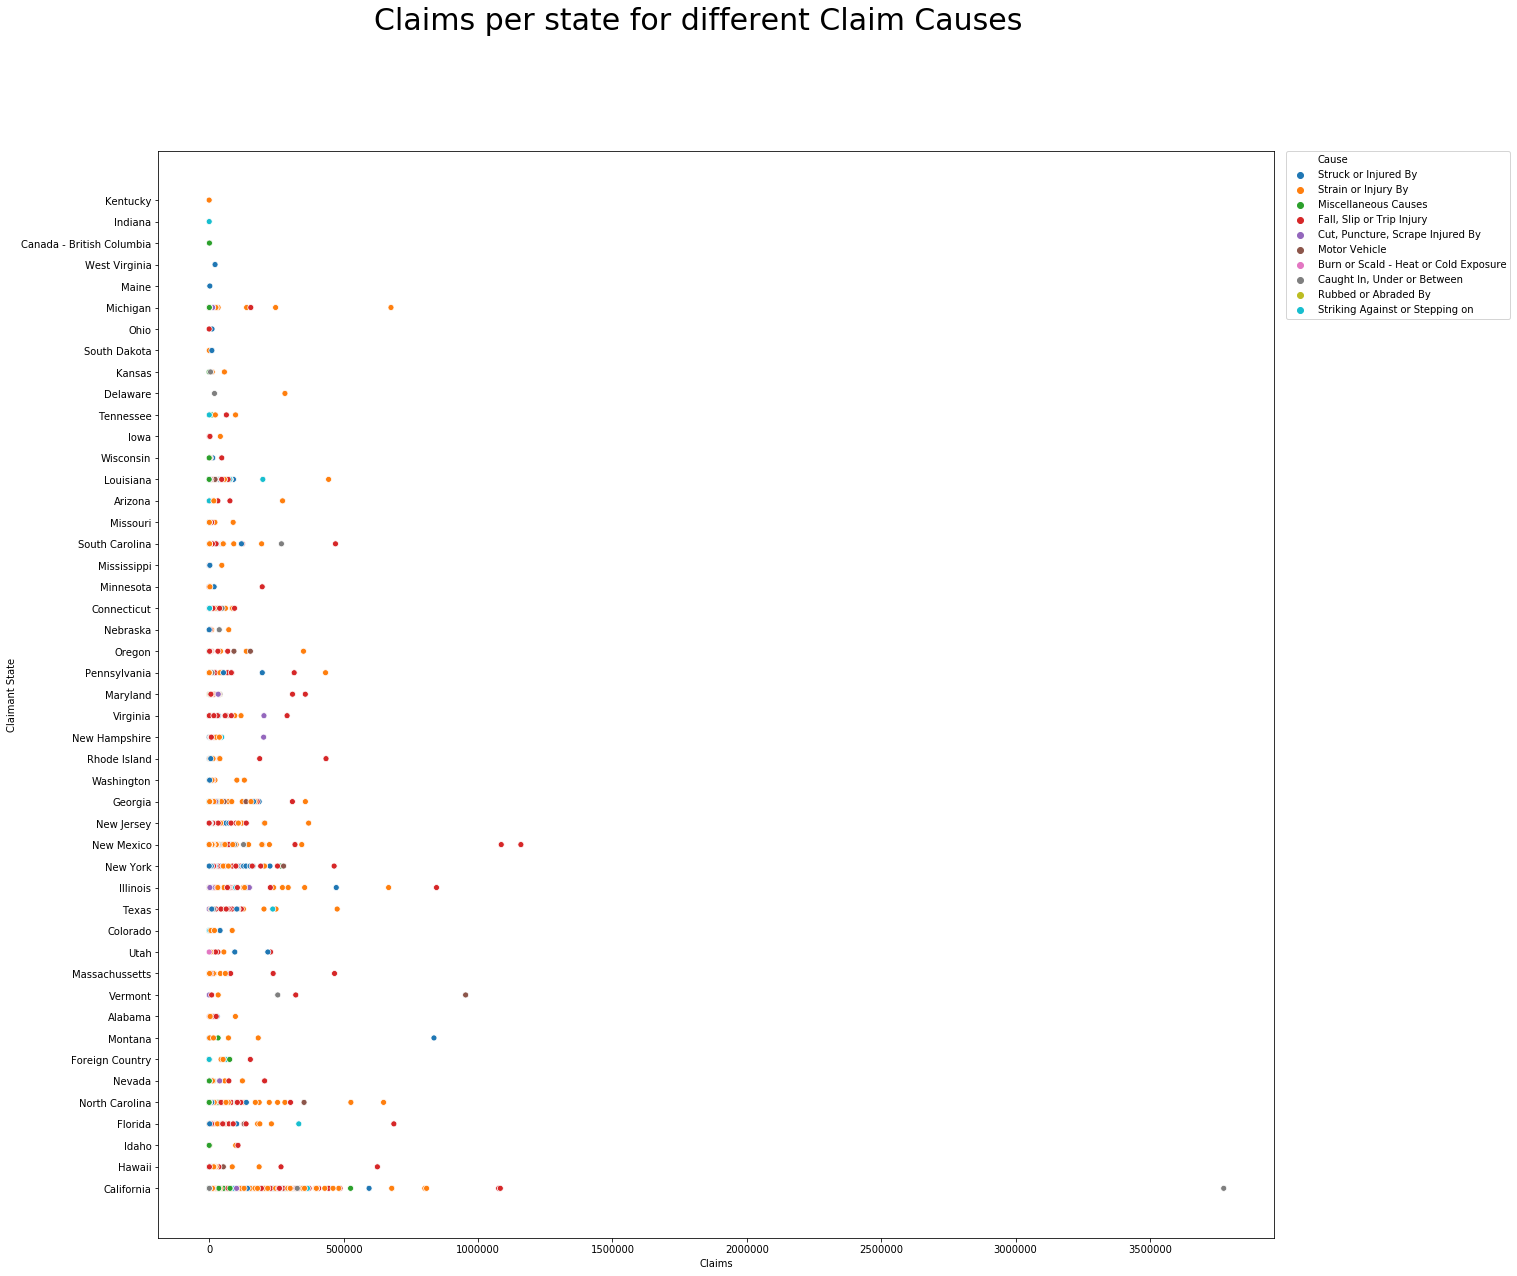

In [151]:

plt.figure(figsize= (20,20))
plt.suptitle("Claims per state for different Claim Causes", fontsize=30)
sns.scatterplot(x="Claims", y = 'Claimant State',hue='Cause',data = claims)
plt.legend(bbox_to_anchor=(1.01,1),loc=2, borderaxespad=0)

The above chart compares the claims of various countries and gives us a general trend in terms of what claims are observed by each state with respect to the Claim Causes of its citizens.

We can observe that the people who stay in the biggest states like California, New York, and Illinois have the highest claims generated and the outlier is in the state of California and the cause being  Caught in, under or between. This could be because of the higher number of accidents that can take place or higher stress levels of individuals due to work, family, etc.

# Correlation between Claims amount and Policy Year using dropdown menu 

In [87]:
@ipywidgets.interact(year=claims['Policy Year'].unique())
def histogram_plot(year):
    plt.figure(figsize=(10,10))
    
    plt.clf()
    plt.hist(claims[claims['Policy Year'] == year]['Claims'])
    plt.xlabel('Claims')
    plt.ylabel('Count')
    plt.show()

interactive(children=(Dropdown(description='year', options=(2001, 2002, 2000, 2003, 2004, 2005, 2006, 2007, 20…

As the Policy Year is switched by choosing the value from the dropdown menu, the claims count and the claim amount spent in that particular year can be observed. A histogram is a perfect tool for this because it lets us visualize the data distribution of the values. From this, we can deduce that most of the claims that actually go through have a really low amount. As the claim amount increases, the frequency of it reduces drastically.

# Correlation between Claims amount and Policy Year using Interactivity and other features - Claims category and Claims cause

In [120]:
claims_5 = px.scatter(claims, x="Policy Year", y="Claims", log_x=True,hover_name="Claims_Category",hover_data=["Cause"])
claims_5.update_layout(
    title=" Claims amount vs Policy Year",
    xaxis_title="Policy Year",
    yaxis_title="Claims amount",
    font=dict(
        family="Courier New, monospace",
        size=18))       

claims_5.show()

The above visualization for our project shows a scatter plot of the claims amount generated and the policy year. Looking at the Scatterplot we can see that the average number of claims amount that people acquire in this data set is between 0-1 million but mostly it is dense in the range of 0- 0.5 million.

There are a few outliers that we see as well for the amount of the claim between 1 million to 1.5 million for all the policy years. It is interesting to note that all theses outliers have the claims category and the cause of the injury which are common. The claims category is Critical claims and the cause of injury is Fall, Slip, or Trip Injury. This makes us aware of the running trends in the causes of injury and the categories. This can further be used to generalize or find the most common causes of injury.

The most noticeable outlier with a maximum claim amount of whopping 3.77 million has some key features such as its main cause was Caught in, under or between and the claims category is also critical. This outlier can lead to variance in the data and can skew the average value of the mean claim amount.

The plot is interactive as well where we can zoom in on an area to get a more in-depth analysis of the claimants. The tooltip gives additional information about the Claims category, Cause of the injury that caused the person to claim, claim amounts, and the policy year.


In [20]:
claims['Cause'].value_counts()

Strain or Injury By                      1962
Fall, Slip or Trip Injury                1177
Struck or Injured By                      828
Miscellaneous Causes                      636
Cut, Puncture, Scrape Injured By          534
Striking Against or Stepping on           301
Caught In, Under or Between               208
Motor Vehicle                             146
Burn or Scald - Heat or Cold Exposure      75
Rubbed or Abraded By                        5
Name: Cause, dtype: int64

So from the above cell, the findings that we found for the primary dataset are that the most popular cause of the injury for the claims of outlier is Fall, Slip or Trip Injury is almost correct. It is the second most popular cause. 

Also,looking at the above graph we can observe that the most popular cause - Strain or Injury By usually leads to lower claims amount and a person is also more susceptible to this in their daily life.  

In [64]:
# Top causes of claims in the state of new york

claims_reasons=claims.groupby(['Claimant State', 'Cause'])['Claims'].count().reset_index()
claims_reasons[claims_reasons['Claimant State']=='New York'].sort_values("Claims", ascending = False)

,Claimant State,Cause,Claims
179,New York,Strain or Injury By,138
175,New York,"Fall, Slip or Trip Injury",105
181,New York,Struck or Injured By,76
176,New York,Miscellaneous Causes,40
174,New York,"Cut, Puncture, Scrape Injured By",34
180,New York,Striking Against or Stepping on,16
173,New York,"Caught In, Under or Between",15
177,New York,Motor Vehicle,12
172,New York,Burn or Scald - Heat or Cold Exposure,5
178,New York,Rubbed or Abraded By,1


So from the above cell,for the primary dataset that the most popular cause of the injury for the claims for people in the state of new york is Strain or Injury by. This is in accordance with the overall popular cause for the entire dataset.

In the next part, we will observe the data only for the State of New York.

##  Analysis using two contextual visualizations 

###  This data is of the Workers’ Compensation Board (WCB) of the State of New York. It consists of columns such as injury description, body part injured description, and average weekly wage which are similar to the ones in the dataset we are currently using.

Using this dataset we will look at how the average weekly wages vary for the injury nature which is nothing but the injury causes for the State of New York.

In [21]:
# Retrieving the csv file
claims_ny = pd.read_csv("Assembled_Claims_by_OIICS_Codes_for_Incident.csv", 
                      low_memory=False)  

claims_ny

,OIICS Part Of Body Description,OIICS Nature of Injury Description,OIICS Injury Source Description,OIICS Event Exposure Description,Claim Identifier,Average Weekly Wage
0,Abdomen,"Arthropod-borne diseases, other",Animals and animal products,Assaults by animals,1,$813.72
1,Abdomen,Bacterial diseases,Infectious and parasitic agents,"Exposure to caustic, noxious, or allergenic su...",1,NaN
2,Abdomen,Benign neoplasms and tumors,"Nonmetallic minerals, except fuel","Exposure to caustic, noxious, or allergenic su...",1,$1438.00
3,Abdomen,Burns,"Aromatics and hydrocarbon derivatives, except ...","Exposure to caustic, noxious, or allergenic su...",1,$271.90
4,Abdomen,Burns,Atmospheric and environmental conditions,Contact with temperature extremes,4,$578.39
...,...,...,...,...,...,...
36748,Wrist(s),"Traumatic injuries to muscles, tendons, joints...","Vehicle, unspecified","Nonhighway accident, except rail, air, water",2,$468.78
36749,Wrist(s),"Traumatic injuries to muscles, tendons, joints...","Vehicle, unspecified","Pedestrian, nonpassenger struck by vehicle, mo...",1,$361.98
36750,Wrist(s),"Traumatic injuries to muscles, tendons, joints...",Water vehicle,Fall to lower level,1,$2183.59
36751,Wrist(s),"Traumatic injuries to muscles, tendons, joints...",Water vehicle,Overexertion,1,$864.75


In [22]:
claims_ny.columns

Index(['OIICS Part Of Body Description', 'OIICS Nature of Injury Description',
       'OIICS Injury Source Description', 'OIICS Event Exposure Description',
       'Claim Identifier', 'Average Weekly Wage'],
      dtype='object')

### 1. Plot for the Reasons of the claim and the mean of the average weekly wage 


We can look at the various graphs from the visualization interface on the official website of the WCB. It shows the various causes of the claims for the Workers’ Compensation Board (WCB) of the State of New York and the average weekly wage of the workers. 

This will help analyze the injury causes in NY: by going in deep. In the earlier dataset, we saw that the 9 general causes of the claims where this dataset has 36 causes. Looking at the image, the average weekly wage of a person suffering from circulatory system diseases is higher. This could be because as the wage rises, the stress a person rises and that directly affects the heart. Also, New York is one of the biggest cities in the world needless to say the stress a person would feel because of the competition must be immense. 

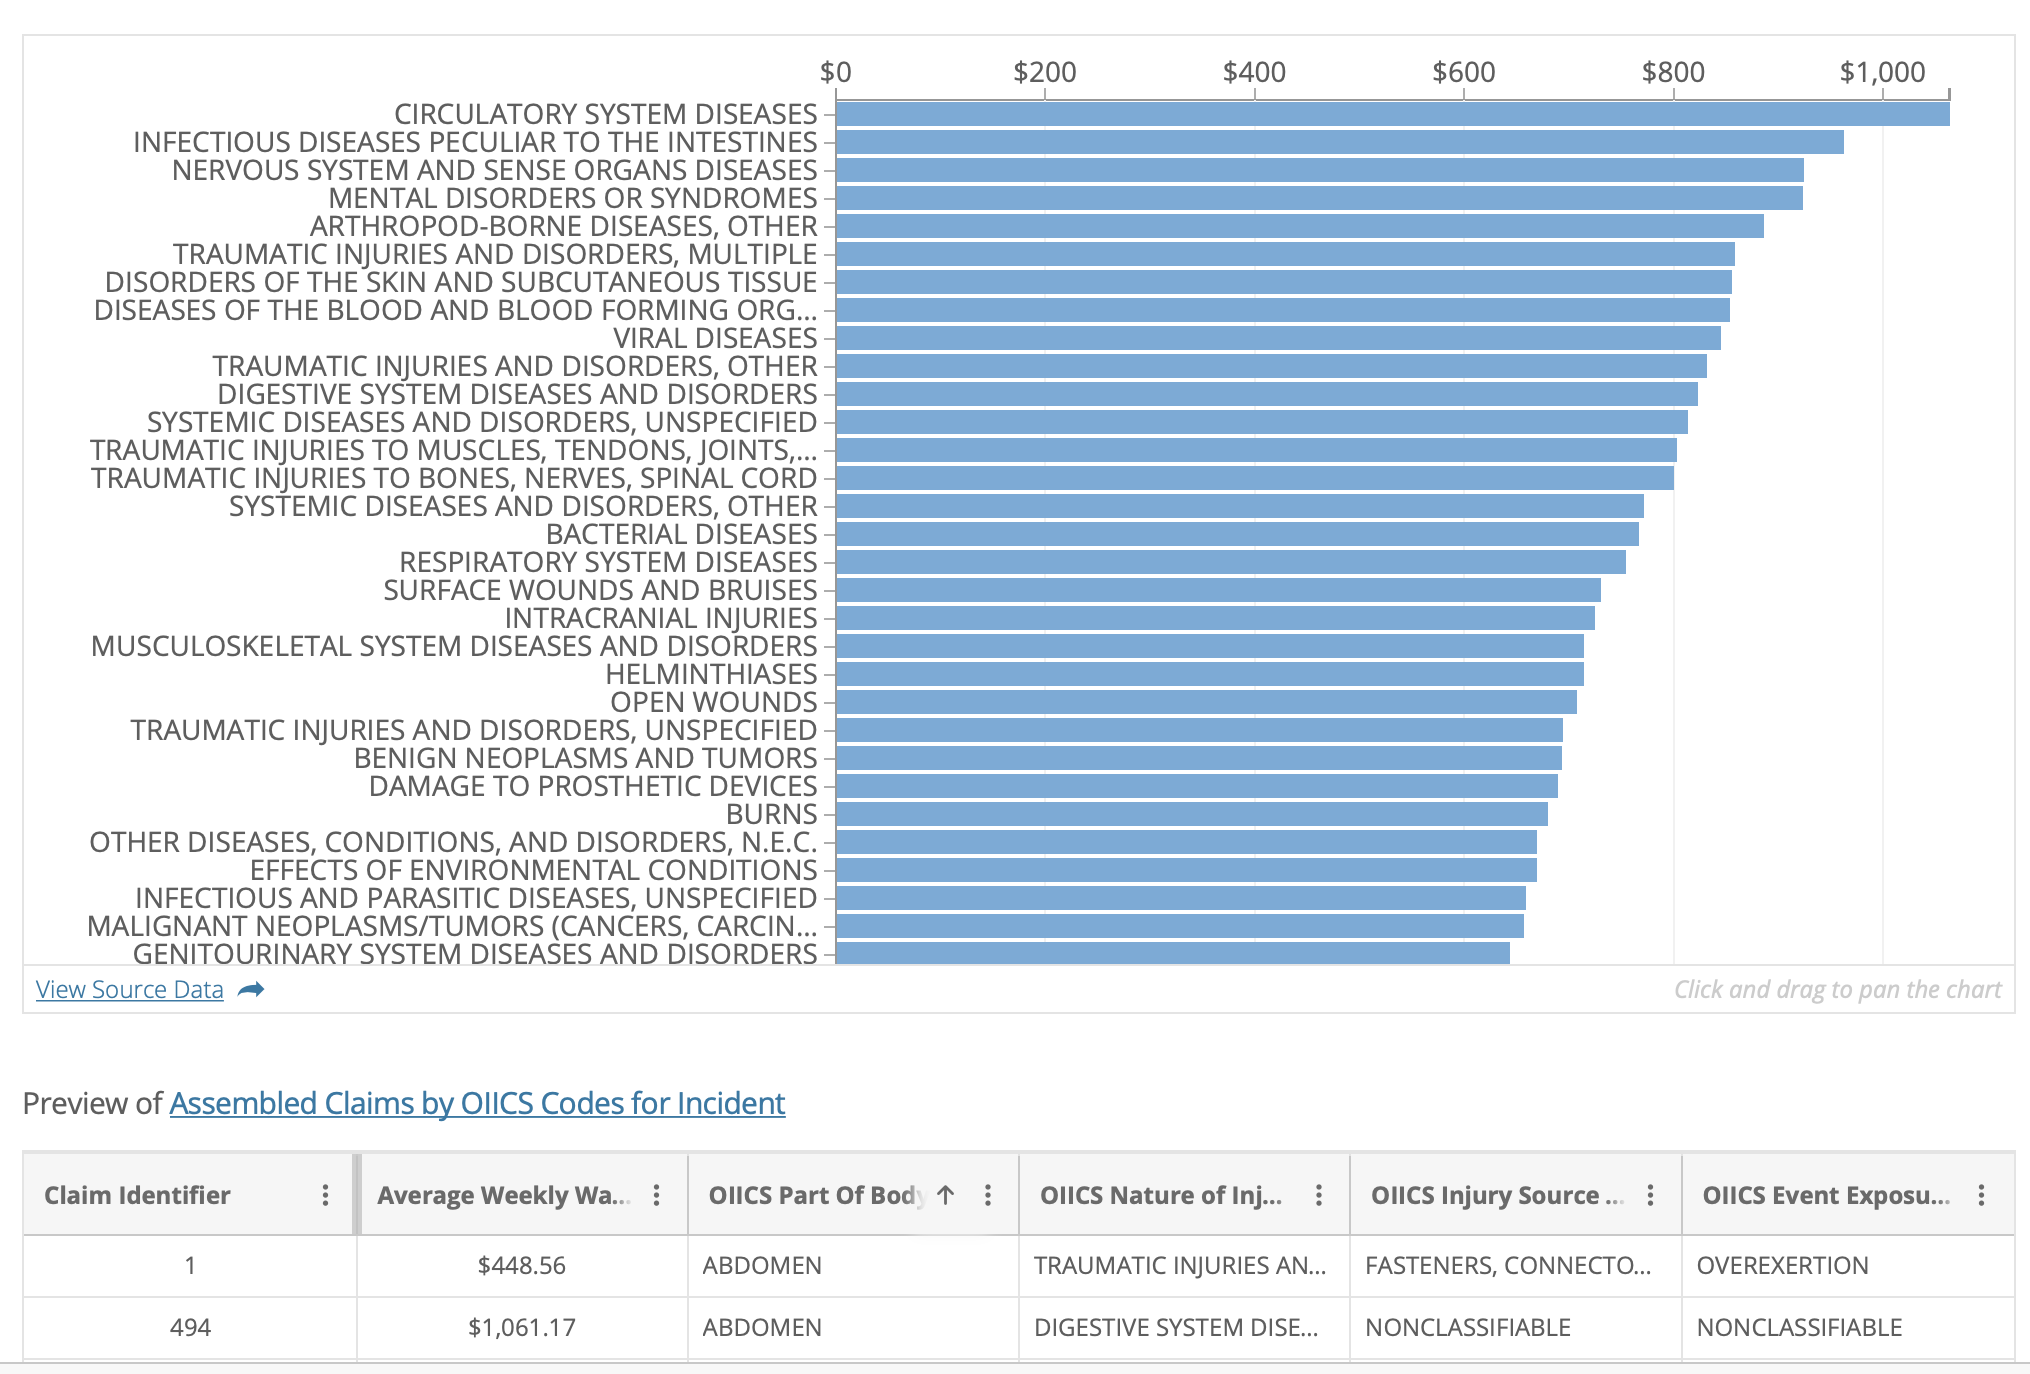

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "NY_VIZ.png"
Image(filename = PATH , width=1600, height=5600)

### 2. Plot shows the count of the Top 10 Reasons for the claim in the State of New York


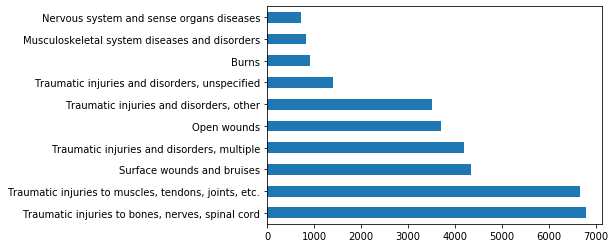

In [54]:
claims_ny['OIICS Nature of Injury Description'].value_counts()[:10].plot(kind='barh')

The above plot shows that the most popular reasons for the claim are due to traumatic injuries (bones, muscles, joints, etc). These injuries are similar to the ones we found in the primary set. Although they called the cause as Strain by, it does lead to traumatic injuries to the body parts mentioned. But it is interesting to note here that the traumatic injuries as a whole can mean a lot of things. So, if we had a dataset that clubbed it all together or mentioned explicitly the range of traumatic injuries without the 'etc', then that would help streamline this analysis.

Using this analysis, we can conclude that even though there are some discrepancies in the dataset, the overall trend of the popular causes for the claim remains the same. So, the claimant should be more mindful of the injuries they can get through this and the insurance companies should make sure they have policies in place to deal with this cause wherein they can get the maximum premium from the person who has the history of injuring their bones, muscles, etc.

In [65]:
## Looking at the second dataset

# Retrieving the csv file
claims_pt = pd.read_csv("claims-2.csv",header= 0, encoding= 'unicode_escape',engine = 'python')  
#claims_pt


,ClaimID,TotalPaid_End,TotalReserves_End,TotalRecovery_End,IndemnityPaid,OtherPaid,ClaimantStatus_End,IncidentDate,IncidentDescription,EmploymentStartDate,...,ClaimReceivedDate,IsDenied,OSHAInjuryDescription,ClaimantAge_at_DOI,Gender,ClaimantType,InjuryCause,InjuryNature,BodyPartRegion,BodyPart
0,633915,11947.55,0,0.0,243.65,11703.9,C,6/17/2009,Employee was moving concrete rings and install...,5/24/2004,...,7/2/2009,0,Employee was moving concrete rings- strained l...,49.0,Male,Indemnity,Heavy Object,Strain,Trunk,Lower Back Area
1,633916,0,0,0.0,0,0,C,6/26/2009,Employee was pulling lining. He felt a pop in ...,8/13/2004,...,7/2/2009,0,Employee Was Pulling Lining. He Felt A Pop In ...,49.0,Male,Medical Only,Bodily Motion,Strain,Trunk,Lower Back Area
2,633917,9295.89,0,0.0,0,9295.89,C,6/25/2009,Employee was in the restroom. He heard a screa...,4/16/1990,...,7/2/2009,0,"Startled by another person, fell onto left hand",47.0,Male,Indemnity,Other Person,Fracture,Upper Extremities,Hand
3,633918,1026.29,0,0.0,0,1026.29,C,6/12/2009,Employee was unloading truck using a pallet ja...,5/22/2006,...,7/2/2009,0,Employee Was Unloading Truck Using A Pallet Ja...,61.0,Male,Medical Only,Equipment,Contusion,Upper Extremities,Shoulder(S)
4,633919,43108.03,0,0.0,40000,3108.03,C,6/29/2009,Employee was leaning over to pick up a piece o...,5/16/2003,...,7/2/2009,0,Employee Was Leaning Over To Pick Up A Piece O...,41.0,Female,Indemnity,Floor,Strain,Trunk,Lower Back Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134001,62186651,0,0,0.0,0,0,O,6/25/2014,"Walking along shoulder of highway, stepped in ...",9/1/2003,...,6/30/2014,0,"Walking along shoulder of highway, stepped in ...",44.0,Male,Indemnity,Not Available,Sprain,Lower Extremities,Ankle
134002,62186888,0,0,0.0,0,0,O,6/23/2014,Odor from pig carcasses from biology lab (),8/6/2012,...,6/30/2014,0,Odor from pig carcasses from biology lab (),71.0,Female,Medical Only,Not Available,Respiratory Disorders,Neck,Soft Tissue-Neck
134003,62186889,0,0,0.0,0,0,C,6/24/2014,EE gave resident a shower in a shower chair. A...,8/3/2009,...,6/30/2014,0,NaN,61.0,Female,Report Only,Patient Handling,Sprain,Upper Extremities,Shoulder(S)
134004,62186890,0,0,0.0,0,0,O,6/26/2014,Employee was punched in the chest by a patient...,7/18/2011,...,6/30/2014,0,Employee was punched in the chest by a patient...,24.0,Male,Indemnity,Patient Handling,Contusion,Trunk,Chest


In [86]:
# Top 10 causes of injury 
#claims_pt['InjuryNature'].value_counts()[:10].plot(kind='barh')

# The most popular being the Sprain

claims_pt2= px.scatter(claims_pt[:10],x='InjuryNature',y='TotalPaid_End',hover_name="AverageWeeklyWage",hover_data=["BodyPart"])

claims_pt2.update_layout(
    title=" Claims amount vs Injury Nature",
    xaxis_title="Injury Nature",
    yaxis_title="Claims amount",
    font=dict(
        family="Calibri, monospace",
        size=11))     

claims_pt2.show()

The chart above shows the 10 most-frequently occurring titles from the last Series. It shows the injury causes which demand a higher claim amount in general. This graph is interactive in nature wherein each point on the graph shows the claim amount,average weekly wage and the body part injured. You also zoom in and pan in/out and make use of other features by hovering the mouse over the chart. The options are present on the top right corner of the chart.


In [69]:
'''
claims_pt1 = px.scatter(claims_pt, x="BodyPart", y="TotalPaid_End",hover_name="AverageWeeklyWage",hover_data=["InjuryNature"])
claims_pt1.update_layout(
    title=" Claims amount vs Policy Year",
    xaxis_title="Body Part injured",
    yaxis_title="Claims amount",
    font=dict(
        family="Courier New, monospace",
        size=18))       

claims_pt1.show()

'''

'\nclaims_pt1 = px.scatter(claims_pt, x="BodyPart", y="TotalPaid_End",hover_name="AverageWeeklyWage",hover_data=["InjuryNature"])\nclaims_pt1.update_layout(\n    title=" Claims amount vs Policy Year",\n    xaxis_title="Body Part injured",\n    yaxis_title="Claims amount",\n    font=dict(\n        family="Courier New, monospace",\n        size=18))       \n\nclaims_pt1.show()\n\n'

# References

### Datasets
1. Primary Dataset : https://data.world/chiragckarkera/base-analytics/workspace/file?filename=Claims.csv
2. NY Dataset :  https://data.world/stateofny/claims-by-oiics-codes
   Offical website : https://data.ny.gov/Government-Finance/Assembled-Claims-by-OIICS-Codes-for-Incident/3md2-awdu
3. Claims 3 dataset for dataworld:  https://data.world/bpatki/mbad-6100-claims/workspace/file?filename=claims.csv  

Visualization Interface (Image) : https://data.ny.gov/d/3md2-awdu/visualization

bqplot documentation<br>
matplotlib documentation<br>
stackoverflow<br>
seaborn documentation<br>
plotly documentation<br>
ipywidget documentation<br>
pandas documentation
